In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_score, recall_score, f1_score)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Handle imbalanced data
from imblearn.over_sampling import SMOTE

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries loaded successfully")
print(f"Training started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ All libraries loaded successfully
Training started: 2025-11-29 16:03:13


In [2]:
# Load processed data
print("Loading processed data...")
df = pd.read_csv('../data/processed/processed_churn_data.csv')

print(f"✓ Data loaded: {df.shape[0]:,} rows × {df.shape[1]:,} columns")

# Separate features and target
X = df.drop(['churn', 'customer_id'], axis=1, errors='ignore')
y = df['churn']

print(f"\nFeatures: {X.shape[1]} columns")
print(f"Target: {y.name}")
print(f"\nClass distribution:")
print(f"   Not Churned (0): {(y==0).sum():,} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"   Churned (1): {(y==1).sum():,} ({(y==1).sum()/len(y)*100:.1f}%)")

# Feature names
feature_names = X.columns.tolist()
print(f"\nFeature names (first 10): {feature_names[:10]}")

Loading processed data...
✓ Data loaded: 7,043 rows × 59 columns

Features: 57 columns
Target: churn

Class distribution:
   Not Churned (0): 5,174 (73.5%)
   Churned (1): 1,869 (26.5%)

Feature names (first 10): ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'total_services']


In [3]:
# Split data into train and test sets
print("Splitting data into train and test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Train set: {X_train.shape[0]:,} samples")
print(f"✓ Test set: {X_test.shape[0]:,} samples")

# Handle class imbalance with SMOTE
print(f"\nHandling class imbalance with SMOTE...")
print(f"   Before SMOTE - Train set distribution:")
print(f"      Not Churned: {(y_train==0).sum():,}")
print(f"      Churned: {(y_train==1).sum():,}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\n   After SMOTE - Train set distribution:")
print(f"      Not Churned: {(y_train_balanced==0).sum():,}")
print(f"      Churned: {(y_train_balanced==1).sum():,}")
print(f"✓ Classes are now balanced!")

# Feature scaling
print(f"\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Features scaled using StandardScaler")
print(f"\nReady for model training!")

Splitting data into train and test sets...
✓ Train set: 5,634 samples
✓ Test set: 1,409 samples

Handling class imbalance with SMOTE...
   Before SMOTE - Train set distribution:
      Not Churned: 4,139
      Churned: 1,495

   After SMOTE - Train set distribution:
      Not Churned: 4,139
      Churned: 4,139
✓ Classes are now balanced!

Scaling features...
✓ Features scaled using StandardScaler

Ready for model training!


In [4]:
# Train multiple models
print("TRAINING MODELS")
print("=" * 60)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = datetime.now()
    
    # Train model
    model.fit(X_train_scaled, y_train_balanced)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    duration = (datetime.now() - start_time).total_seconds()
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'duration': duration
    }
    
    print(f"   ✓ Trained in {duration:.2f} seconds")
    print(f"   Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")
    print(f"   F1 Score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

print("\n" + "=" * 60)
print("All models trained successfully!")

TRAINING MODELS

Training Logistic Regression...
   ✓ Trained in 13.55 seconds
   Accuracy: 0.8006 | Precision: 0.6332 | Recall: 0.5909
   F1 Score: 0.6113 | ROC-AUC: 0.8487

Training Random Forest...
   ✓ Trained in 2.08 seconds
   Accuracy: 0.7736 | Precision: 0.5737 | Recall: 0.5722
   F1 Score: 0.5730 | ROC-AUC: 0.8248

Training XGBoost...
   ✓ Trained in 0.74 seconds
   Accuracy: 0.7771 | Precision: 0.5794 | Recall: 0.5856
   F1 Score: 0.5824 | ROC-AUC: 0.8214

All models trained successfully!


MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  Training Time (s)
Logistic Regression  0.800568   0.633238 0.590909  0.611342 0.848707          13.546046
      Random Forest  0.773598   0.573727 0.572193  0.572959 0.824789           2.080848
            XGBoost  0.777147   0.579365 0.585561  0.582447 0.821384           0.741938


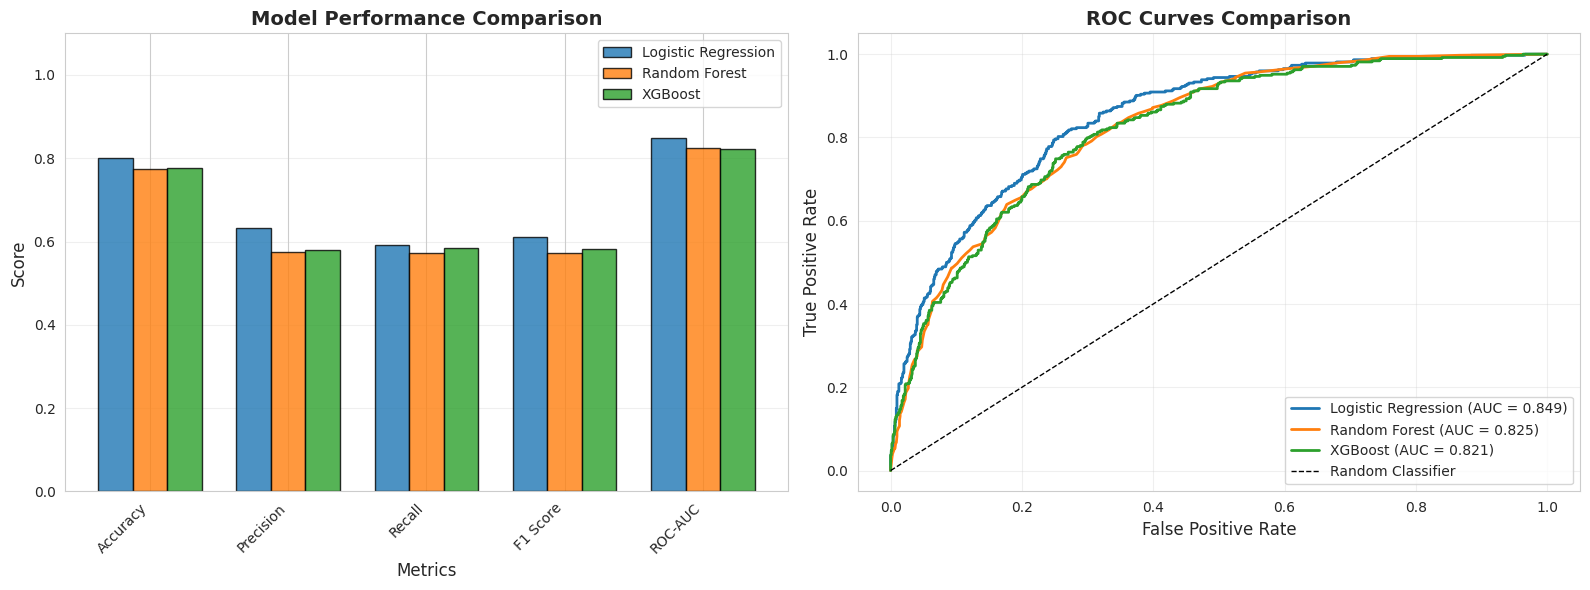


Best Model: Logistic Regression
   ROC-AUC Score: 0.8487


In [8]:
# Compare models
print("MODEL COMPARISON")
print("=" * 60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1 Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()],
    'Training Time (s)': [results[m]['duration'] for m in results.keys()]
})

print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics comparison
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
x = np.arange(len(metrics_to_plot))
width = 0.25

for i, model_name in enumerate(results.keys()):
    values = [results[model_name][m] for m in metrics_to_plot]
    axes[0].bar(x + i*width, values, width, label=model_name, alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metric_labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, 1.1)

# ROC Curves
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    axes[1].plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})", linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
print(f"\nBest Model: {best_model_name}")
print(f"   ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")

DETAILED EVALUATION: Logistic Regression


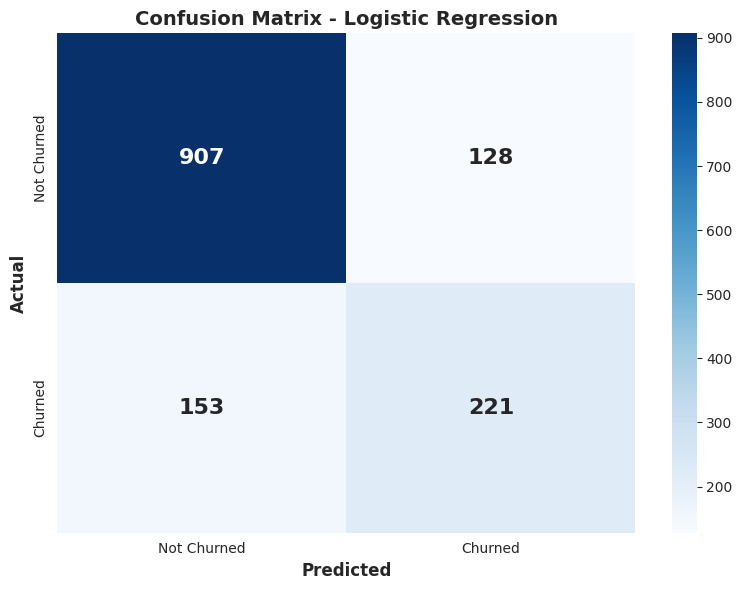


Confusion Matrix Breakdown:
   True Negatives (TN):  907 - Correctly predicted NOT churned
   False Positives (FP): 128 - Incorrectly predicted churned
   False Negatives (FN): 153 - Incorrectly predicted NOT churned
   True Positives (TP):  221 - Correctly predicted churned

Classification Report:
              precision    recall  f1-score   support

 Not Churned     0.8557    0.8763    0.8659      1035
     Churned     0.6332    0.5909    0.6113       374

    accuracy                         0.8006      1409
   macro avg     0.7444    0.7336    0.7386      1409
weighted avg     0.7966    0.8006    0.7983      1409


Business Insights:
   Total test customers: 1,409
   Actual churned: 374 (26.5%)
   Predicted churned: 349 (24.8%)
   Correctly identified churners: 221 (59.1% of actual churners)
   Missed churners: 153 (40.9% of actual churners)



In [9]:
# Detailed evaluation of best model
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

print(f"DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate detailed metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Breakdown:")
print(f"   True Negatives (TN):  {tn:,} - Correctly predicted NOT churned")
print(f"   False Positives (FP): {fp:,} - Incorrectly predicted churned")
print(f"   False Negatives (FN): {fn:,} - Incorrectly predicted NOT churned")
print(f"   True Positives (TP):  {tp:,} - Correctly predicted churned")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_best, 
                          target_names=['Not Churned', 'Churned'],
                          digits=4))

# Business metrics
total_test = len(y_test)
actual_churned = (y_test == 1).sum()
predicted_churned = (y_pred_best == 1).sum()

print(f"\nBusiness Insights:")
print(f"   Total test customers: {total_test:,}")
print(f"   Actual churned: {actual_churned:,} ({actual_churned/total_test*100:.1f}%)")
print(f"   Predicted churned: {predicted_churned:,} ({predicted_churned/total_test*100:.1f}%)")
print(f"   Correctly identified churners: {tp:,} ({tp/actual_churned*100:.1f}% of actual churners)")
print(f"   Missed churners: {fn:,} ({fn/actual_churned*100:.1f}% of actual churners)")

print("\n" + "=" * 60)

FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features (from XGBoost):
                        Feature  Importance
                  contract_risk    0.306919
payment_method_Electronic check    0.136227
   internet_service_Fiber optic    0.135963
                   payment_risk    0.043413
                  phone_service    0.028717
           streaming_movies_Yes    0.026233
             multiple_lines_Yes    0.022488
               streaming_tv_Yes    0.021806
                     dependents    0.018964
        charges_category_Medium    0.017613
                   has_internet    0.015332
     charges_category_Very High    0.015167
                         tenure    0.014723
                 total_services    0.014682
                        partner    0.011950
              tenure_group_4yr+    0.011217
          device_protection_Yes    0.010735
                  total_charges    0.010696
                     has_family    0.010628
          charges_category_High    0.009399


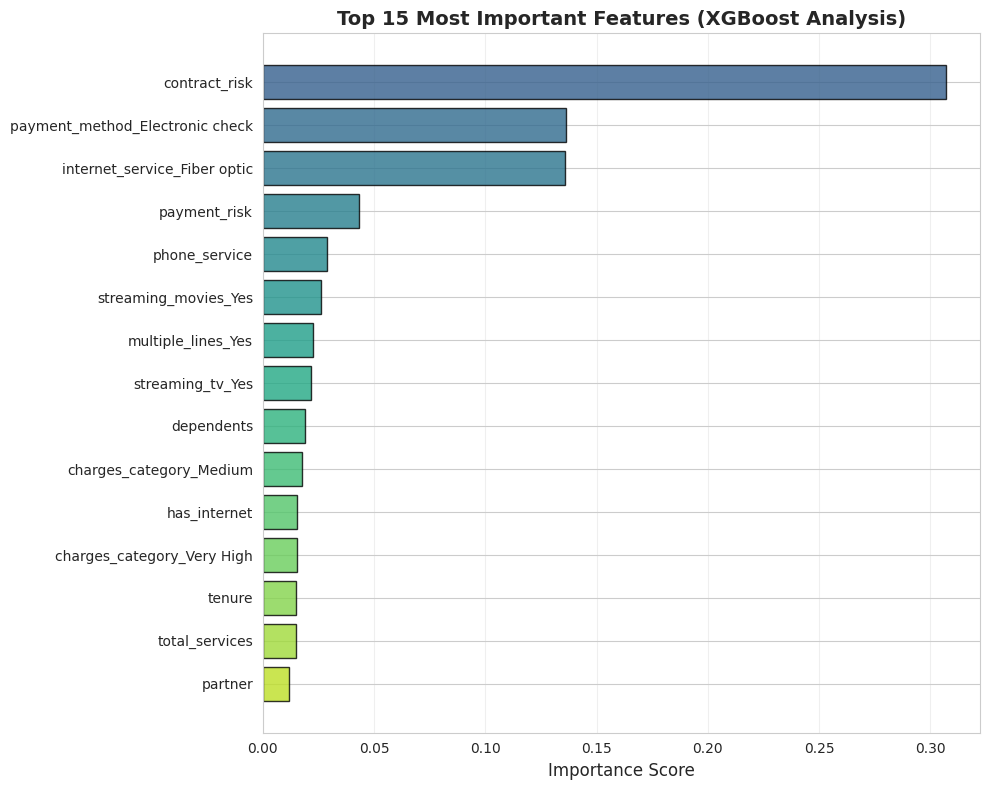


Insights:
   - Top 13 features explain 80% of importance
   - Top 22 features explain 90% of importance
   - Most important feature: contract_risk

Note: Best performing model is Logistic Regression
   But XGBoost provides interpretable feature importance for analysis



In [11]:
# Feature Importance Analysis - Use XGBoost for visualization
print(f"FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Use XGBoost for feature importance (even if not best model)
xgb_model = results['XGBoost']['model']
importances = xgb_model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(f"\nTop 20 Most Important Features (from XGBoost):")
print(feature_importance_df.head(20).to_string(index=False))

# Visualize top 15 features
top_n = 15
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))
plt.barh(range(top_n), top_features['Importance'].values, color=colors, edgecolor='black', alpha=0.8)
plt.yticks(range(top_n), top_features['Feature'].values)
plt.xlabel('Importance Score', fontsize=12)
plt.title(f'Top {top_n} Most Important Features (XGBoost Analysis)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate cumulative importance
cumsum = feature_importance_df['Importance'].cumsum()
n_features_80 = (cumsum <= 0.8).sum() + 1
n_features_90 = (cumsum <= 0.9).sum() + 1

print(f"\nInsights:")
print(f"   - Top {n_features_80} features explain 80% of importance")
print(f"   - Top {n_features_90} features explain 90% of importance")
print(f"   - Most important feature: {feature_importance_df.iloc[0]['Feature']}")

print(f"\nNote: Best performing model is {best_model_name}")
print(f"   But XGBoost provides interpretable feature importance for analysis")

print("\n" + "=" * 60)

In [12]:
# Save the best model and scaler
print(f"SAVING MODEL AND ARTIFACTS")
print("=" * 60)

# Save the best model
model_path = f'../data/models/{best_model_name.lower().replace(" ", "_")}_model.pkl'
joblib.dump(best_model, model_path)
print(f"✓ Model saved: {model_path}")

# Save the scaler
scaler_path = '../data/models/scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler saved: {scaler_path}")

# Save feature names
feature_names_path = '../data/models/feature_names.pkl'
joblib.dump(feature_names, feature_names_path)
print(f"✓ Feature names saved: {feature_names_path}")

# Save model performance metrics
metrics_path = '../data/models/model_metrics.txt'
with open(metrics_path, 'w') as f:
    f.write(f"CHURN PREDICTION MODEL PERFORMANCE\n")
    f.write(f"=" * 60 + "\n\n")
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    f.write(f"METRICS:\n")
    f.write(f"  Accuracy:  {results[best_model_name]['accuracy']:.4f}\n")
    f.write(f"  Precision: {results[best_model_name]['precision']:.4f}\n")
    f.write(f"  Recall:    {results[best_model_name]['recall']:.4f}\n")
    f.write(f"  F1 Score:  {results[best_model_name]['f1']:.4f}\n")
    f.write(f"  ROC-AUC:   {results[best_model_name]['roc_auc']:.4f}\n\n")
    f.write(f"DATASET:\n")
    f.write(f"  Total samples: {len(df):,}\n")
    f.write(f"  Training samples: {len(X_train_balanced):,}\n")
    f.write(f"  Test samples: {len(X_test):,}\n")
    f.write(f"  Number of features: {len(feature_names)}\n\n")
    f.write(f"CONFUSION MATRIX:\n")
    f.write(f"  True Negatives:  {tn:,}\n")
    f.write(f"  False Positives: {fp:,}\n")
    f.write(f"  False Negatives: {fn:,}\n")
    f.write(f"  True Positives:  {tp:,}\n")

print(f"✓ Metrics saved: {metrics_path}")

print(f"\nAll artifacts saved to data/models/")
print(f"\nModel is ready for deployment!")
print("=" * 60)

# Summary
print(f"\nTRAINING SUMMARY")
print(f"=" * 60)
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.2%}")
print(f"ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"Recall (Churn Detection): {results[best_model_name]['recall']:.2%}")
print(f"\nThis model can identify {results[best_model_name]['recall']:.1%} of customers who will churn!")
print(f"=" * 60)

SAVING MODEL AND ARTIFACTS
✓ Model saved: ../data/models/logistic_regression_model.pkl
✓ Scaler saved: ../data/models/scaler.pkl
✓ Feature names saved: ../data/models/feature_names.pkl
✓ Metrics saved: ../data/models/model_metrics.txt

All artifacts saved to data/models/

Model is ready for deployment!

TRAINING SUMMARY
Best Model: Logistic Regression
Accuracy: 80.06%
ROC-AUC: 0.8487
Recall (Churn Detection): 59.09%

This model can identify 59.1% of customers who will churn!
